# Reddit Survey Assignment

Done by Sahil Phule

In [1]:
# Importing Pandas
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the data from the disk into memory
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [3]:
#displaying columns
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

## 1. Data Cleanup

### i. Aggregating Countries to their continents

I have used the python's Countryutlis package which gives out the continent names.


In [4]:
from incf.countryutils import transformations
import urllib
import untangle

# a simple function to find continent of a country
def findconti(x):
    #titlelizing the country names since countryutilis only supports titlelized data
    x = str.title(x)
    #countryutlis dosent seem to undersandw which country United states is, but it understande United States of America..!!
    if x == "United States":
        x = "United States of America"
    # also it doesn't seem to understand what United Kingdom is hence adding the continent manually.
    if x == "United Kingdom" :
        return "Europe"
    try:
        conti = transformations.cn_to_ctn(x)
    except:
        # returing none when the function is unable to find the continent.
        return "None"
    else:
        return conti



In [5]:
# Creating a new continent column by executing the function on the country column

df['continent']=df['Treated country data'].apply(findconti)


In [6]:
# Displaying the newly created continent column.
df.continent

0        North America
1        North America
2        North America
3        North America
4        North America
5        North America
6               Europe
7        North America
8        North America
9               Europe
10       North America
11       North America
12       North America
13              Europe
14       North America
15       North America
16       North America
17              Europe
18                None
19       North America
20              Europe
21              Europe
22              Europe
23       North America
24              Europe
25       North America
26       North America
27       North America
28       North America
29       North America
             ...      
32724    North America
32725    North America
32726    North America
32727           Europe
32728    North America
32729    North America
32730    North America
32731             None
32732    North America
32733    North America
32734    North America
32735    North America
32736    No

### ii. Dropping US states and the country column
Now the new continent column has been created. So droppin both the columns.

In [7]:
df.drop('Treated country data', axis=1, inplace=True)
df.drop('(For U. S. redditors) In which state do you live?', axis=1, inplace=True)

In [8]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19', u'continent'],
      dtype='object')

### iii. Missing Data Handling

I will be checking every column for missing data

In [9]:
df[df['Entry Id'].isnull()]
# mo missind data in ID column

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [10]:
df[df['Please select the category that includes your age.'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [11]:
df[df['What is your marital status?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [12]:
df[df['What best describes your employment status?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [13]:
df[df['Are you or have you ever been in military service?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [14]:
df[df['Do you currently have children under the age of 18 living in your household?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [15]:
df[df['What best describes your level of education?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [16]:
df[df['Which one of the following ranges includes your total yearly household income before taxes?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [17]:
df[df['treated subreddit data'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN,Europe
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,"Under $20,000",NaN,I like cats.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN,Europe
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,none,NaN,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN,North America
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,"$70,000 - $99,999",NaN,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN,North America
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,"$20,000 - $29,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN,Europe
75,76,Male,35-44,Single,Freelance,No,No,Some college,"$70,000 - $99,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN,Europe
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,"$40,000 - $49,999",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN,North America
89,90,Male,18-24,Single,Student,No,No,Some college,"$150,000 or more",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN,North America
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,"$20,000 - $29,999",NaN,I like dogs.,Goat,NaN,NaN,NaN,NaN,NaN,NaN,North America
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,"Under $20,000",NaN,I like turtles.,Goat,NaN,NaN,NaN,NaN,NaN,NaN,North America


In [18]:
# I assumed that the treated subreddit data is the list of subreddits which users like.
#Also every redditers will definitely like the "all" subreddit. Beacause that subreddit is the most visited one.
#So i've filled the missing data with "all"
df['treated subreddit data'] = df['treated subreddit data'].fillna(value='all')

In [19]:
#checking 'treated subreddit data' again for any null value
df[df['treated subreddit data'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [20]:
df[df['Are you a dog or a cat person?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,none,DROP TABLE `users`,NaN,1,7/13/11 15:47,public,NaN,NaN,NaN,NaN,None
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming'),7/14/11 12:12,public,NaN,NaN,NaN,NaN,North America


In [21]:
# there are only two entries. So assigning none to them
df['Are you a dog or a cat person?'] = df['Are you a dog or a cat person?'].fillna(value='none')

In [22]:
#checking 'Are you a dog or a cat person?' again for any null value
df[df['Are you a dog or a cat person?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [23]:
df[df['If you were a cheese, what cheese would you be?'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


In [24]:
df[df['continent'].isnull()]

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,continent


### iv. Dropping blank columns
There were some blank colums present. Dropping them

In [25]:
df.drop('Unnamed: 14', axis=1, inplace=True)
df.drop('Unnamed: 15', axis=1, inplace=True)
df.drop('Unnamed: 16', axis=1, inplace=True)
df.drop('Unnamed: 17', axis=1, inplace=True)
df.drop('Unnamed: 18', axis=1, inplace=True)
df.drop('Unnamed: 19', axis=1, inplace=True)

In [26]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'continent'],
      dtype='object')

### v. Cleaning Bad data
I will be checking every column for bad data and cleaning appropriately if anything is found

In [27]:
df['Please indicate your gender.'].unique()

array(['Male', 'Female', 'None'], dtype=object)

In [28]:
df['Please select the category that includes your age.'].unique()

array(['25-34', '18-24', '35-44', '45-54', 'Under 18', '55-64',
       '65 or Above', 'None'], dtype=object)

In [29]:
df['What is your marital status?'].unique()

array(['Blank', 'Married/civil union/domestic partnership',
       'In a relationship', 'Forever Alone', 'Single', 'Engaged', 'Widowed'], dtype=object)

In [30]:
df['What best describes your employment status?'].unique()

array(['Employed full time', 'Freelance',
       'Not employed, but looking for work',
       'Not employed and not looking for work', 'Student', 'None',
       'Retired'], dtype=object)

In [31]:
df['Are you or have you ever been in military service?'].unique()

array(['none', 'No', 'Yes'], dtype=object)

In [32]:
df['Do you currently have children under the age of 18 living in your household?'].unique()

array(['No', 'Yes', 'None'], dtype=object)

In [33]:
df['What best describes your level of education?'].unique()

array(["Bachelor's degree", 'Some college',
       'High school graduate or equivalent',
       'Graduate or professional degree', 'Trade or Vocational degree',
       'Associate degree', 'Some high school', 'None'], dtype=object)

In [34]:
df['Which one of the following ranges includes your total yearly household income before taxes?'].unique()

array(['$150,000 or more', 'Under $20,000', '$70,000 - $99,999', 'none',
       '$40,000 - $49,999', '$50,000 - $69,999', '$100,000 - $149,999',
       '$20,000 - $29,999', '$30,000 - $39,999'], dtype=object)

In [35]:
df['treated subreddit data'].unique()
# No uniquess in the data

array(['getmotivated', 'gaming', 'snackexchange', ...,
       'this is new to me. like the blog.', 'gurrenlagann', 'maps'], dtype=object)

In [36]:
df['Are you a dog or a cat person?'].unique()

array(['none', 'I like dogs.', 'I like cats.', 'I like turtles.',
       'askreddit', 'movies', ' Reddit.com'], dtype=object)

In [37]:
# Function for cleaning bad values in cat or dog person.
df['Are you a dog or a cat person?'].replace('askreddit|movies| Reddit.com', 'none', regex=True, inplace=True)
    

In [38]:
df['Are you a dog or a cat person?'].unique()

array(['none', 'I like dogs.', 'I like cats.', 'I like turtles.'], dtype=object)

In [39]:
df['If you were a cheese, what cheese would you be?'].unique()

array(['none', 'Cheddar', 'American', 'Provolone', 'Munster', 'Swiss',
       'Goat', 'Feta', 'Other', 'Brie', 'Paneer', 'Limburger', '1',
       ' awww', ' f7u12', "programming')", ' Pics'], dtype=object)

In [40]:
# Cleaning bad values in cheese
df['If you were a cheese, what cheese would you be?'].replace('1|awww| f7u12| Pics', 'none', regex=True, inplace=True)
df['If you were a cheese, what cheese would you be?'].replace(' none', 'none', regex=True, inplace=True)

In [41]:
df['If you were a cheese, what cheese would you be?'].unique()

array(['none', 'Cheddar', 'American', 'Provolone', 'Munster', 'Swiss',
       'Goat', 'Feta', 'Other', 'Brie', 'Paneer', 'Limburger',
       "programming')"], dtype=object)

In [42]:
df.continent.unique()

array(['North America', 'Europe', 'None', 'Oceania', 'Asia',
       'South America', 'Africa'], dtype=object)

### vi. Visualizing the data

In [43]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'continent'],
      dtype='object')

In [44]:
df['Please indicate your gender.'].value_counts()

Male      26418
Female     6135
None        201
Name: Please indicate your gender., dtype: int64

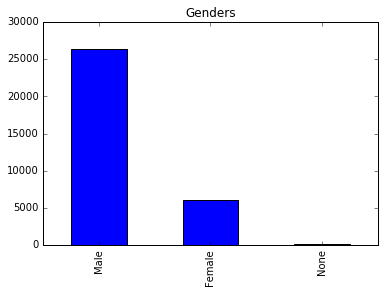

In [45]:
df['Please indicate your gender.'].value_counts().plot(kind='bar',title="Genders")

In [46]:
df['Please select the category that includes your age.'].value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Please select the category that includes your age., dtype: int64

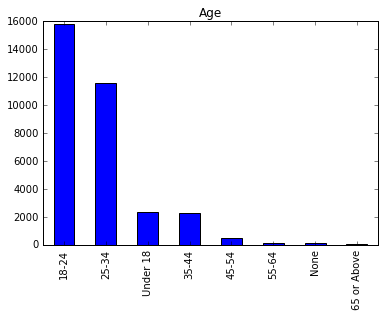

In [47]:
df['Please select the category that includes your age.'].value_counts().plot(kind='bar',title="Age")

In [48]:
df['What is your marital status?'].value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: What is your marital status?, dtype: int64

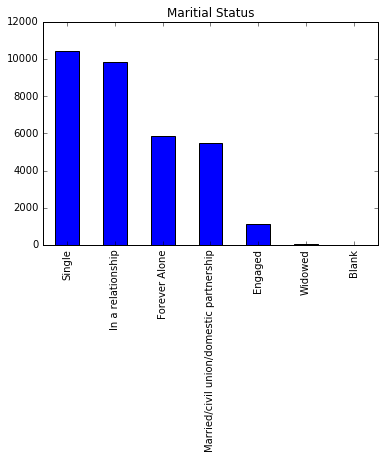

In [49]:
df['What is your marital status?'].value_counts().plot(kind='bar',title="Maritial Status")

In [50]:
df['What best describes your employment status?'].value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: What best describes your employment status?, dtype: int64

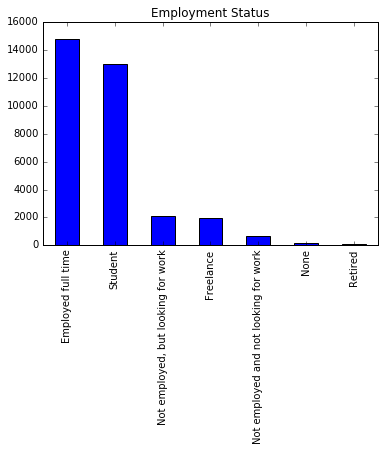

In [51]:
df['What best describes your employment status?'].value_counts().plot(kind='bar',title="Employment Status")

In [52]:
df['Are you or have you ever been in military service?'].value_counts()

No      30526
Yes      2223
none        5
Name: Are you or have you ever been in military service?, dtype: int64

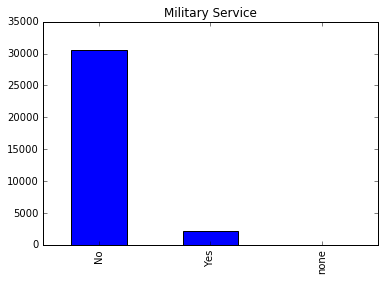

In [53]:
df['Are you or have you ever been in military service?'].value_counts().plot(kind='bar',title="Military Service")

In [54]:
df['Do you currently have children under the age of 18 living in your household?'].value_counts()

No      27488
Yes      5047
None      219
Name: Do you currently have children under the age of 18 living in your household?, dtype: int64

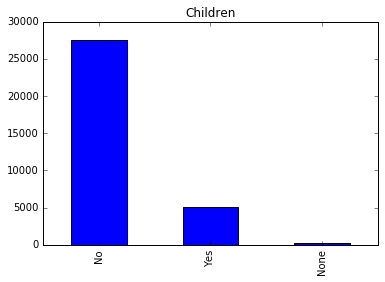

In [55]:
df['Do you currently have children under the age of 18 living in your household?'].value_counts().plot(kind='bar',title="Children")

In [56]:
df['What best describes your level of education?'].value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: What best describes your level of education?, dtype: int64

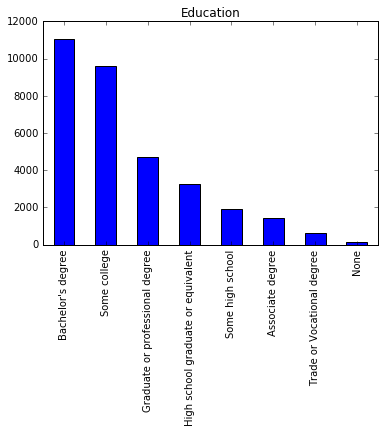

In [57]:
df['What best describes your level of education?'].value_counts().plot(kind='bar',title="Education")

In [58]:
df['Are you a dog or a cat person?'].value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                  11
Name: Are you a dog or a cat person?, dtype: int64

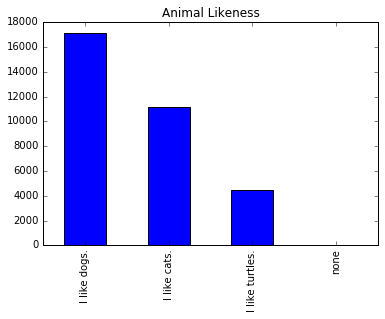

In [59]:
df['Are you a dog or a cat person?'].value_counts().plot(kind='bar',title="Animal Likeness")

In [60]:
df['If you were a cheese, what cheese would you be?'].value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none               10
programming')       1
Name: If you were a cheese, what cheese would you be?, dtype: int64

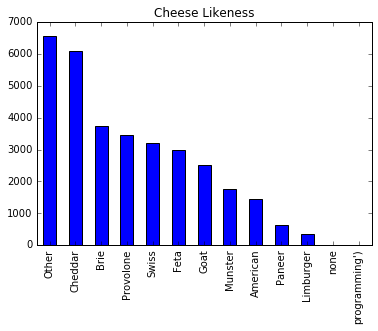

In [61]:
df['If you were a cheese, what cheese would you be?'].value_counts().plot(kind='bar',title="Cheese Likeness")

In [62]:
df.continent.value_counts()

North America    24193
Europe            4929
Oceania           1407
None              1039
Asia               791
South America      276
Africa             119
Name: continent, dtype: int64

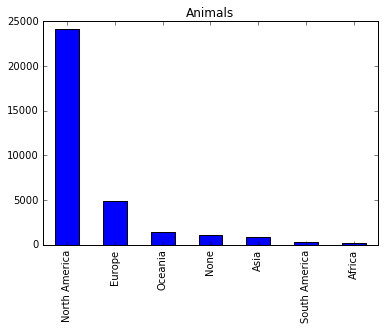

In [63]:
df.continent.value_counts().plot(kind='bar',title="Animals")

### vii. Popping Military column

I will be predicting the military status. So popping that column before creation indicator variables.


In [64]:
y=df.pop("Are you or have you ever been in military service?")

In [65]:
#military service has only 3 variables, and no and none seem to be same.I will be converting it to numeric variable. I will be using 1 = yes, 0 = no/none

def contonum (x):
    if x == "Yes":
        return 1
    return 0

In [66]:
y=y.apply(contonum)

In [67]:
y.unique()

array([0, 1])

### v. Creating Indicator Variables

In [68]:
categorical_variables = ['Please indicate your gender.', 'Please select the category that includes your age.', 'What is your marital status?', 'What best describes your employment status?', 'Do you currently have children under the age of 18 living in your household?','What best describes your level of education?','Which one of the following ranges includes your total yearly household income before taxes?','Are you a dog or a cat person?','If you were a cheese, what cheese would you be?','continent']

nice_names =['gender','age','marital_status','employment_status','childrenu18','education','taxes','catdog','cheese','continent']
for variable,nname in zip(categorical_variables,nice_names):
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=nname)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [69]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(df)

,Entry Id,treated subreddit data,gender_Female,gender_Male,gender_None,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,age_Under 18,marital_status_Blank,marital_status_Engaged,marital_status_Forever Alone,marital_status_In a relationship,marital_status_Married/civil union/domestic partnership,marital_status_Single,marital_status_Widowed,employment_status_Employed full time,employment_status_Freelance,employment_status_None,employment_status_Not employed and not looking for work,"employment_status_Not employed, but looking for work",employment_status_Retired,employment_status_Student,childrenu18_No,childrenu18_None,childrenu18_Yes,education_Associate degree,education_Bachelor's degree,education_Graduate or professional degree,education_High school graduate or equivalent,education_None,education_Some college,education_Some high school,education_Trade or Vocational degree,"taxes_$100,000 - $149,999","taxes_$150,000 or more","taxes_$20,000 - $29,999","taxes_$30,000 - $39,999","taxes_$40,000 - $49,999","taxes_$50,000 - $69,999","taxes_$70,000 - $99,999","taxes_Under $20,000",taxes_none,catdog_I like cats.,catdog_I like dogs.,catdog_I like turtles.,catdog_none,cheese_American,cheese_Brie,cheese_Cheddar,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_none,cheese_programming'),continent_Africa,continent_Asia,continent_Europe,continent_None,continent_North America,continent_Oceania,continent_South America
0,1,getmotivated,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,gaming,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,snackexchange,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,spacedicks,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,aww,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,32752,all,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32750,32753,maps,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32751,32754,funny,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

## 2. Plotting corelation matrix

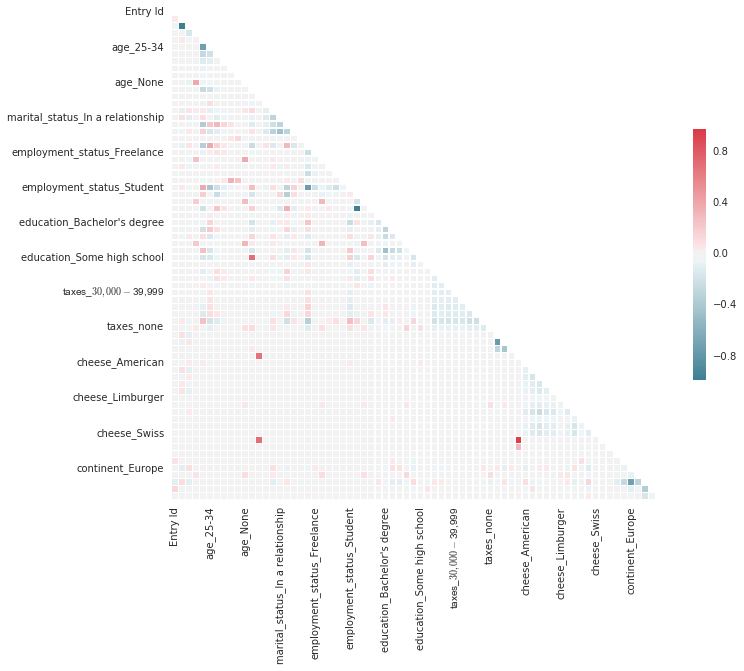

In [70]:
from string import letters
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## 3. Random Forest Regressor

In [71]:
# With the goal above, I will import just what I need. 
# The model to use (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor

# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score



In [72]:
# I will be dropping treated subreddit data because it is not usefull in prediction
df.drop("treated subreddit data",  axis=1, inplace=True)

In [73]:
# now the data frame contains just numeric data
df.head()

,Entry Id,gender_Female,gender_Male,gender_None,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,...,cheese_Swiss,cheese_none,cheese_programming'),continent_Africa,continent_Asia,continent_Europe,continent_None,continent_North America,continent_Oceania,continent_South America
0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
# Dropping entry id since its just a id variable
df.drop("Entry Id", axis=1, inplace=True)

In [85]:
# Let's build our first model. I always have oob_score=True. It is a good idea to increase n_estimators to a number higher than 
# the default. In this case the oob_predictions will be based on a forest of 33 trees. I set random_state=42 so that you all can
# replicate the model exactly.
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

model.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [86]:
# For regression, the oob_score_ attribute gives the R^2 based on the oob predictions. We want to use c-stat, but I mention this 
# for awareness. By the way, attributes in sklearn that have a trailing underscore are only available after the model has been fit.
model.oob_score_

-0.12382925241350451

In [87]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)

c-stat:  0.640016453119


## Variable importance measures

In [91]:
model.feature_importances_

array([  9.39186064e-03,   7.56400243e-03,   2.55361622e-03,
         1.74768889e-02,   1.96606085e-02,   1.26326706e-02,
         6.57807515e-03,   3.15323546e-03,   3.05109514e-03,
         1.71191034e-03,   7.54062163e-03,   3.91729390e-06,
         1.04571272e-02,   2.66885161e-02,   2.97228642e-02,
         1.18255936e-02,   3.34434887e-02,   2.49779873e-03,
         2.11911644e-02,   1.52297056e-02,   2.60377942e-02,
         7.55952931e-03,   1.22705381e-02,   4.76926819e-03,
         1.86541292e-02,   2.03643207e-02,   8.21915427e-03,
         2.09944190e-02,   1.23023183e-02,   2.70712450e-02,
         2.35072590e-02,   1.99835169e-02,   1.58972474e-03,
         2.39475256e-02,   6.45905109e-03,   8.74576590e-03,
         2.11764291e-02,   1.84257488e-02,   2.08235647e-02,
         1.94882729e-02,   2.18275287e-02,   2.61753944e-02,
         2.35410231e-02,   2.30290655e-02,   1.08362282e-02,
         3.63533581e-02,   4.15111266e-02,   2.72506449e-02,
         3.93476965e-06,

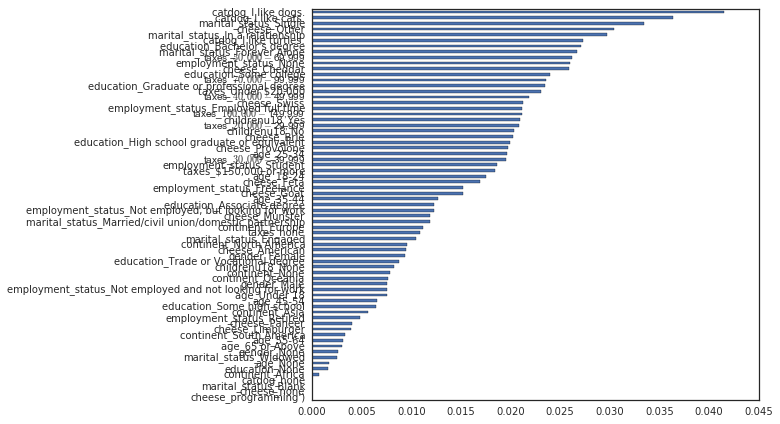

In [92]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(8,7));

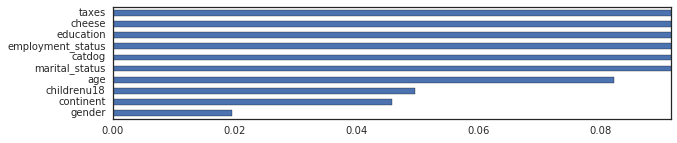

In [93]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort_values(inplace=True)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
 


graph_feature_importances(model, df.columns, summarized_columns=nice_names)

## Parameter Testing

### max_features

auto option
C-stat:  0.65201893644

None option
C-stat:  0.65201893644

sqrt option
C-stat:  0.655772803386

log2 option
C-stat:  0.654054123702

0.9 option
C-stat:  0.65136505063

0.2 option
C-stat:  0.656387563164



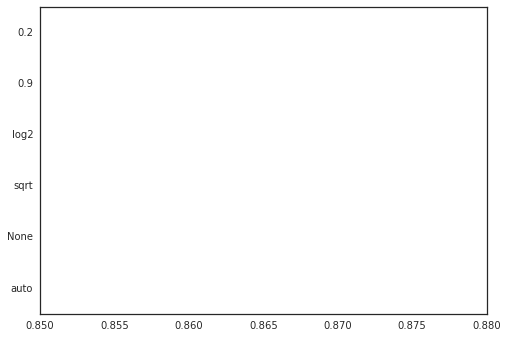

In [94]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(df, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

### min samples leaf

1 min samples
C-stat:  0.65201893644

2 min samples
C-stat:  0.662775832821

3 min samples
C-stat:  0.67226068007

4 min samples
C-stat:  0.679267370894

5 min samples
C-stat:  0.6846970638

6 min samples
C-stat:  0.68833618266

7 min samples
C-stat:  0.691555921429

8 min samples
C-stat:  0.693834123273

9 min samples
C-stat:  0.696231051371

10 min samples
C-stat:  0.698481347093



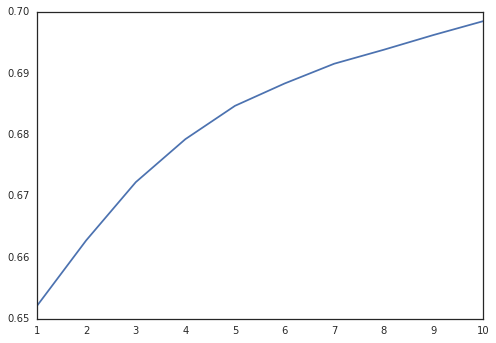

In [95]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

### Some more min samples leaf
As c stat was increasing, trying some more min sample leaves options

11 min samples
C-stat:  0.700632078075

12 min samples
C-stat:  0.702057367766

13 min samples
C-stat:  0.703557093427

14 min samples
C-stat:  0.704718041129

15 min samples
C-stat:  0.705544903639

16 min samples
C-stat:  0.706441686159

17 min samples
C-stat:  0.707120855446

18 min samples
C-stat:  0.707999463625

19 min samples
C-stat:  0.708465867152

20 min samples
C-stat:  0.708697219803



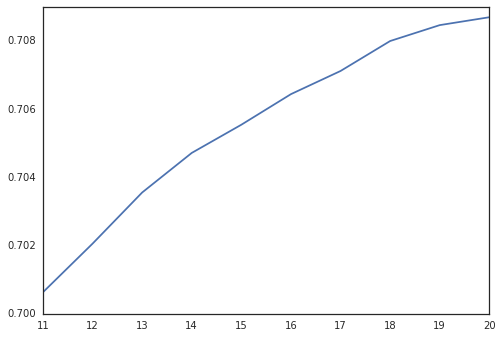

In [97]:
results = []
min_samples_leaf_options = [11,12,13,14,15,16,17,18,19,20]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

### Even  more min samples leaf
C  stat is still increasing, so trying even some more min sample leaves options

21 min samples
C-stat:  0.709182593305

22 min samples
C-stat:  0.709582819247

23 min samples
C-stat:  0.709878780316

24 min samples
C-stat:  0.710177106186

25 min samples
C-stat:  0.71038864166

26 min samples
C-stat:  0.710354377835

27 min samples
C-stat:  0.710775378662

28 min samples
C-stat:  0.71098849067

29 min samples
C-stat:  0.711101993736

30 min samples
C-stat:  0.711378800656



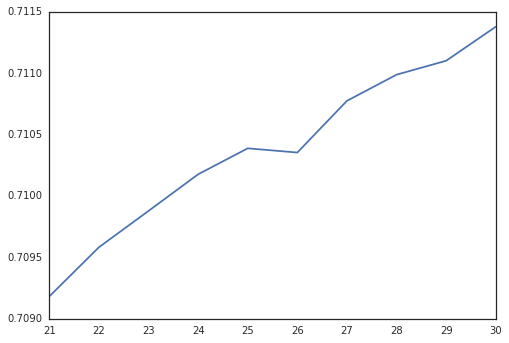

In [98]:
results = []
min_samples_leaf_options = [21,22,23,24,25,26,27,28,29,30]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

### A little more min sample leaf

C stat seems to be gradually stabilizing but adding a few samples more just to be sure

In [ ]:
results = []
min_samples_leaf_options = [31,32,33,34,35,36,37,38,39,40]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

## Final Model

In [ ]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(df, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc
